### Loading library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Randomly pruduce data based on the requiremnent

In [3]:
df1 = pd.DataFrame()
np.random.seed(0)
df1['age'] = np.random.randint(20, 60, 10000)
df1['sex'] = np.random.randint(0, 2, df1.shape[0])
df1['height'] = np.random.randint(140, 185, df1.shape[0])
df1['kid_no'] = np.random.randint(0, 3, df1.shape[0])
df1.to_csv('Random_Produced_Car_Customer_Prederence_Result.csv')
df1.head(5)

,age,sex,height,kid_no
0,20,1,144,2
1,23,1,161,1
2,23,0,173,0
3,59,0,155,2
4,29,0,157,2


### The decision tree of my rule

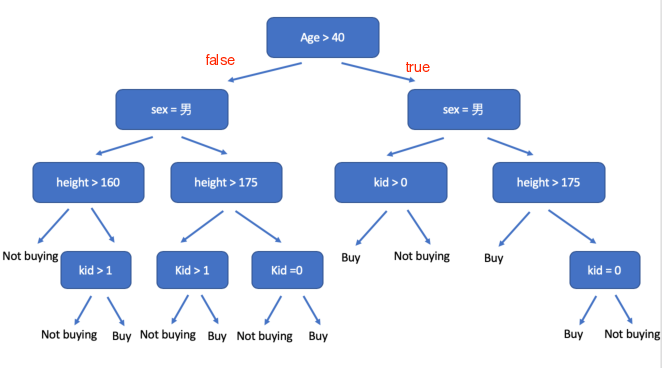

In [4]:
from wand.image import Image as WImage
WImage(filename='original_rule.pdf')

### Based on the rule, we can produce the purchase column.

In [5]:
df1['purchase'] = 0

def f(x):
    return 0
for indexs, row in df1.iterrows():
    if((row['age']<40) and (row['sex']==0) and (row['height']>160)  and (row['kid_no']>1)):
        row['purchase'] = 1
    elif((row['age']<40) and (row['sex']==1) and (row['height']<=175)  and (row['kid_no']>1)):
        row['purchase'] = 1
    elif((row['age']<40) and (row['sex']==1) and (row['height']>175)  and (row['kid_no'] == 0)):
        row['purchase'] = 1
    elif((row['age']>40) and (row['sex']==0) and (row['kid_no'] == 0)):
        row['purchase'] = 1
    elif((row['age']>40) and (row['sex']==1) and (row['height']<=175)):
        row['purchase'] = 1
    elif((row['age']>40) and (row['sex']==1) and (row['height']>175) and (row['kid_no'] == 0)):
        row['purchase'] = 1
df1.head()

,age,sex,height,kid_no,purchase
0,20,1,144,2,1
1,23,1,161,1,0
2,23,0,173,0,0
3,59,0,155,2,0
4,29,0,157,2,0


### This data is about people who will buy one special car, now the comapany ask a data scientist to find out the rule to predict who will want to buy their car.

- sex: 0 represents women, 1 represents men
- kid_no represents the number of the customer's children
- purchase: 0 represents that the customer did not buy the car, 1 represents that the person bought it.

## Split the data into train and test set

In [6]:
from sklearn.model_selection import train_test_split
X = df1.drop('purchase',1)
y = df1['purchase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Build the decision tree

In [7]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO 
import pydotplus
from wand.image import Image as WImage
from sklearn import ensemble, metrics

In [25]:
dtree=DecisionTreeClassifier(max_depth=4)
dtree.fit(X_train,y_train)

dot_data = StringIO()
export_graphviz(dtree, 
                out_file=dot_data,  
                filled=True, 
                feature_names=list(X_train),
                class_names=['not_buy','buy'],
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("car_purchase_decision_tree.pdf")

True

In [26]:
dtree.feature_importances_

array([0.14530938, 0.33541531, 0.15327897, 0.36599633])

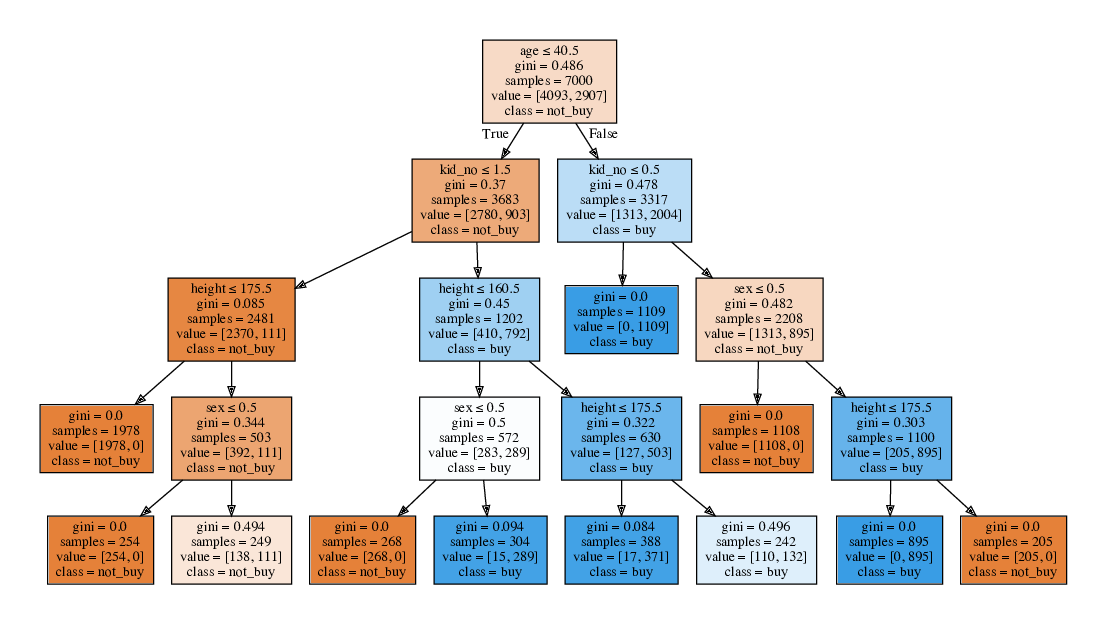

In [27]:
WImage(filename='car_purchase_decision_tree.pdf')

In [28]:
y_pred = dtree.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

0.96


## Discussion

### The following will going to prove that if we use more data to train the model, the accuracy will improve.
- data number = 200, Accuracy = 0.9166
- data number = 400, Accuracy = 0.9333
- data number = 600, Accuracy = 0.9222 (decsrease!! Sometimes, it happens.)
- data number = 800, Accuracy = 0.9500
- data number = 1000, Accuracy = 0.9600
- data number = 10000, Accuracy = 0.9603
- data number = 20000, Accuracy = 0.9641

### By adding the tree hieght, the accuracy will improve significantly. 
### However, we need to consider the situation of overfitting, so I still prefer to use four layers.
### If the hight = 6, the accuracy will be 1.0.

#### 從新的decision tree diagram分析，發現有部分被改進，原先可能需要三個layer 的分類，新的圖只需要兩層，算是意外的收穫。
#### 另外像是高度的分類，都算是切得相當準確，不過像是child_no 不可能會有小數點的情況卻發生了。

## Compare the decision tree with my rule
### 如果採用準確率最高的decision tree 來分析的話，會發現kid_no 和 sex 的順序和原先設計的資料不一樣，可能是因為演算法設計的關係，因為即使數據量達到100000 此順序依然不會被改變，所以準確度依然無法達到100 %，不過九成多的準確度已經算是相當高，以下的例子將測試實際情形中，更混亂的資訊下，準確率大幅下降的情形，所以九成已經是相當不錯的表現。

### ---------------------------------------------------------------------------------------------------------

### 為了進一步檢驗decision tree驗算法的可靠性，從Kaggle中找到一個醫療相關的數據，
### 以下將用decision tree and random forest 的方式檢視此種方法是否可在實際狀況下運作並發揮其效能。

# Grab the Data From Kaggle

In [15]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data contains; 

- age - age in years 
- sex - (1 = male; 0 = female) 
- cp - chest pain type 
- trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
- chol - serum cholestoral in mg/dl 
- fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
- restecg - resting electrocardiographic results 
- thalach - maximum heart rate achieved 
- exang - exercise induced angina (1 = yes; 0 = no) 
- oldpeak - ST depression induced by exercise relative to rest 
- slope - the slope of the peak exercise ST segment 
- ca - number of major vessels (0-3) colored by flourosopy 
- thal - 3 = normal; 6 = fixed defect; 7 = reversable defect 
- target - have disease or not (1=yes, 0=no)

## No null value in dataset

In [16]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Split the data into Training and testing data

In [17]:
from sklearn.model_selection import train_test_split
X = df.drop('target',1)
X = X[['cp','oldpeak','thal','ca']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##### Note: 在此練習中必須使用train_test_split因為此dataframe最後一行為ordering所以如果使用按照順序的取法會大幅降低準確度至只剩5成

## Build the decision tree

In [18]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO 
import pydotplus
from wand.image import Image as WImage

In [19]:
dtree=DecisionTreeClassifier(max_depth=4)
dtree.fit(X_train,y_train)

dot_data = StringIO()
export_graphviz(dtree, 
                out_file=dot_data,  
                filled=True, 
                feature_names=list(X_train),
                class_names=['yes','not'],
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("tree_DecisionTree.pdf")

True

In [20]:
dtree.feature_importances_

array([0.20832972, 0.16978141, 0.23083613, 0.39105274])

#### Note: 由此可以看出 number of major vessels 這個變因最為關鍵

## Decision Tree

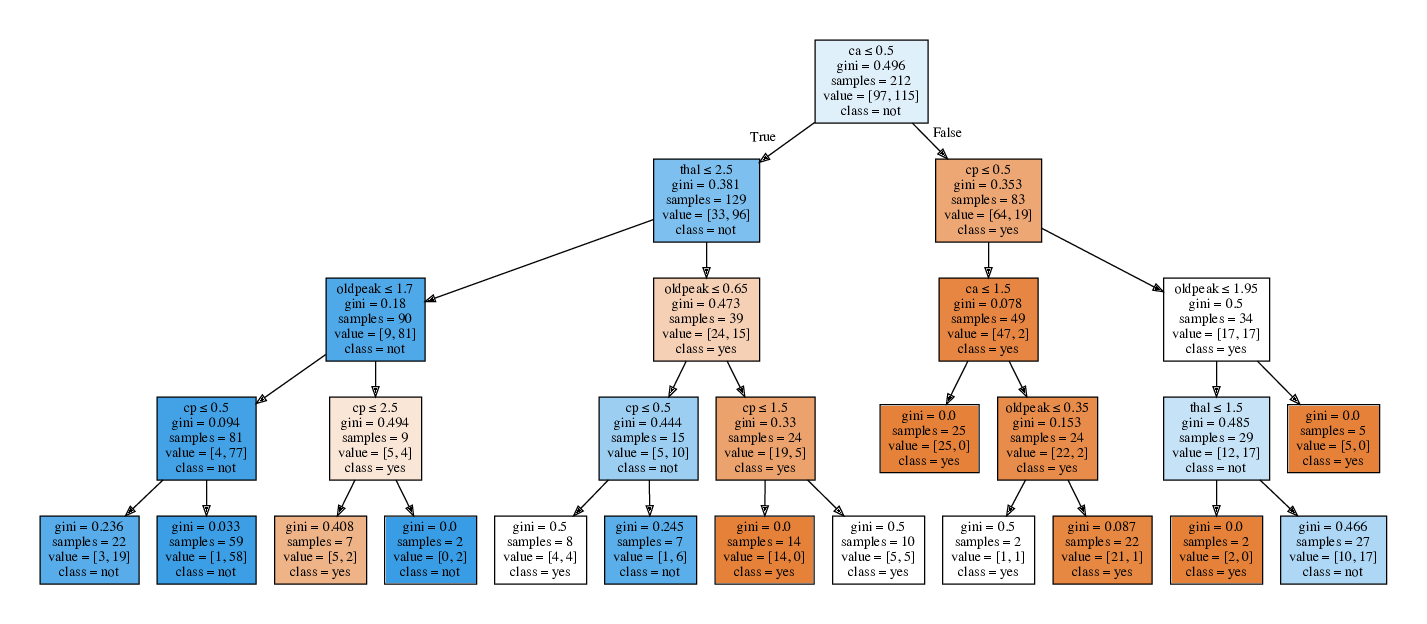

In [21]:
WImage(filename='tree_DecisionTree.pdf')

In [22]:
y_predict = dtree.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8241758241758241

## Why the accuracy is relatively low??
- the data features are not related
- the data number is too small

#### Hence, this decision tree's accuracy will be lower than the previous one based on easier data.
#### This data is more defficult to train.

# Now, trying random forest to increase the accuracy

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble, metrics

In [25]:
forest = ensemble.RandomForestClassifier(n_estimators = 60,criterion = 'entropy', random_state= 0)
forest_fit = forest.fit(X_train, y_train)

dot_data = StringIO()
export_graphviz(dtree, 
                out_file=dot_data,  
                filled=True, 
                feature_names=list(X_train),
                class_names=['yes','not'],
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("tree_randomForest.pdf")

True

In [26]:
y_pred = forest.predict(X_test)

In [27]:
dtree.feature_importances_

array([0.20832972, 0.16978141, 0.23083613, 0.39105274])

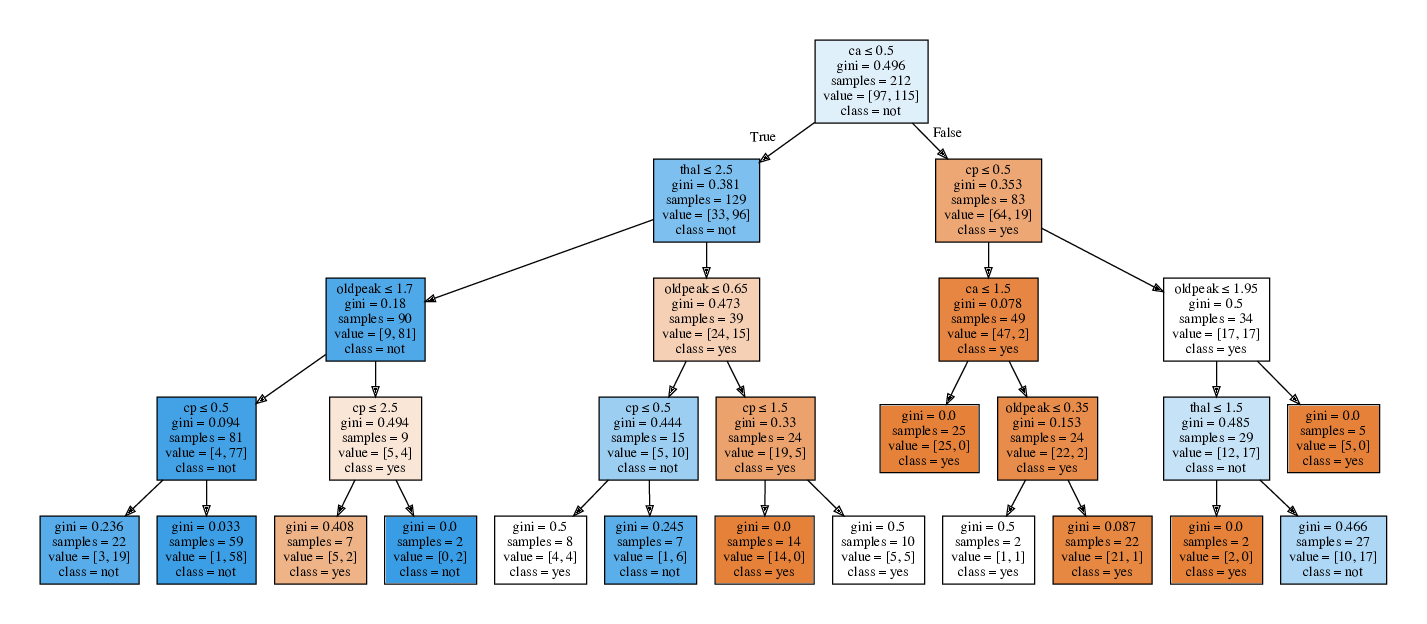

In [28]:
WImage(filename='tree_randomForest.pdf')

In [29]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

0.7912087912087912


#### The accuracy has not been improved. The most critical reason may be that the number of the data is too limited, so the model cannot approach the expection. Consequently, the number of data is very important in data analysis. It is also interested to find out that the accuracy will decrease as n_estimators is larger.